# Camera Calibration

In [1]:
%matplotlib inline
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle

0 camera_cal/calibration3.jpg


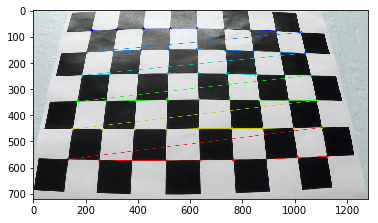

1 camera_cal/calibration18.jpg


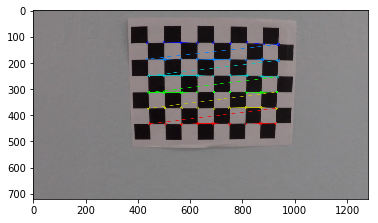

2 camera_cal/calibration12.jpg


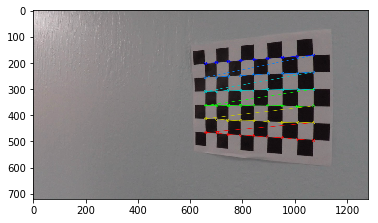

3 camera_cal/calibration13.jpg


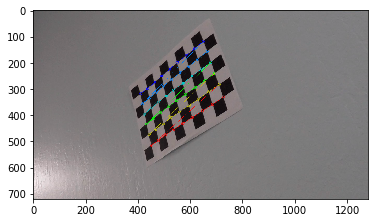

4 camera_cal/calibration2.jpg


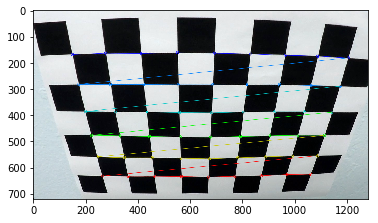

5 camera_cal/calibration19.jpg


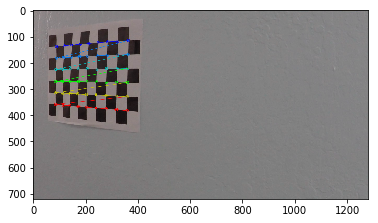

6 camera_cal/calibration10.jpg


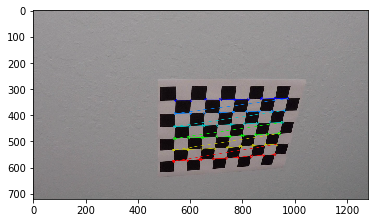

7 camera_cal/calibration4.jpg


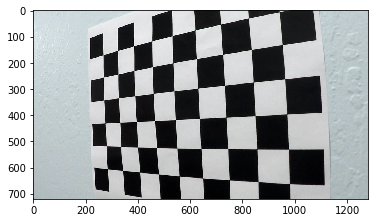

8 camera_cal/calibration7.jpg


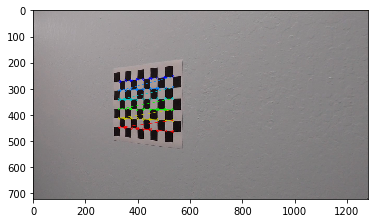

9 camera_cal/calibration14.jpg


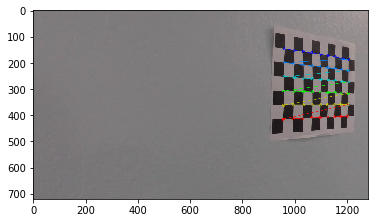

10 camera_cal/calibration11.jpg


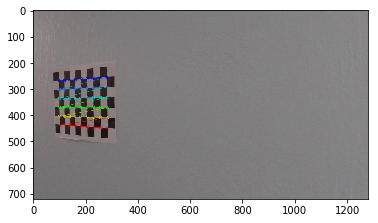

11 camera_cal/calibration6.jpg


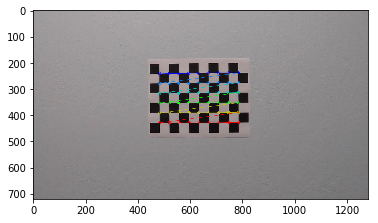

12 camera_cal/calibration8.jpg


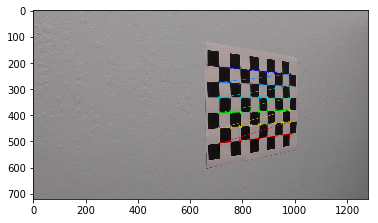

13 camera_cal/calibration20.jpg


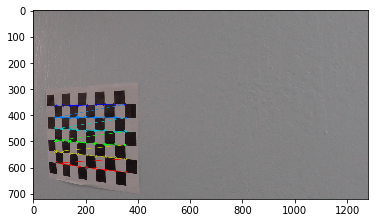

14 camera_cal/calibration16.jpg


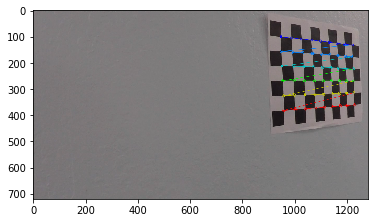

15 camera_cal/calibration5.jpg


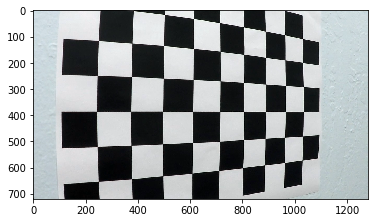

16 camera_cal/calibration9.jpg


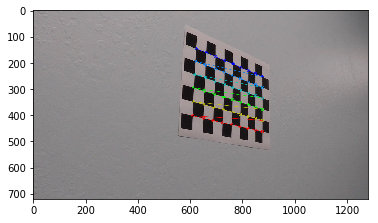

17 camera_cal/calibration15.jpg


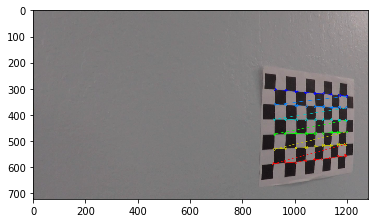

18 camera_cal/calibration17.jpg


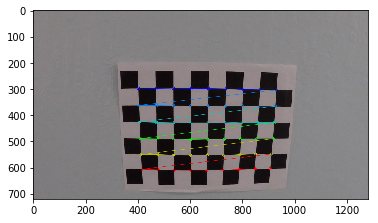

19 camera_cal/calibration1.jpg


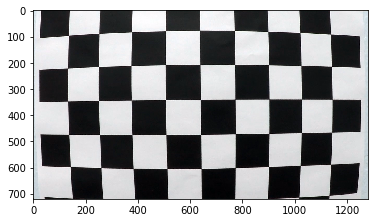

In [2]:
def calc_calibration_points(chess_y=6, chess_x=9):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((chess_y*chess_x,3), np.float32)
    objp[:,:2] = np.mgrid[0:chess_x, 0:chess_y].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob('camera_cal/calibration*.jpg')

    # Step through the list and search for chessboard corners
    for idx, fname in enumerate(images):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (chess_x,chess_y), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            cv2.drawChessboardCorners(img, (chess_x,chess_y), corners, ret)

        print(idx, fname)
        plt.imshow(img)
        plt.show()
    
    return objpoints, imgpoints

objpoints, imgpoints = calc_calibration_points()

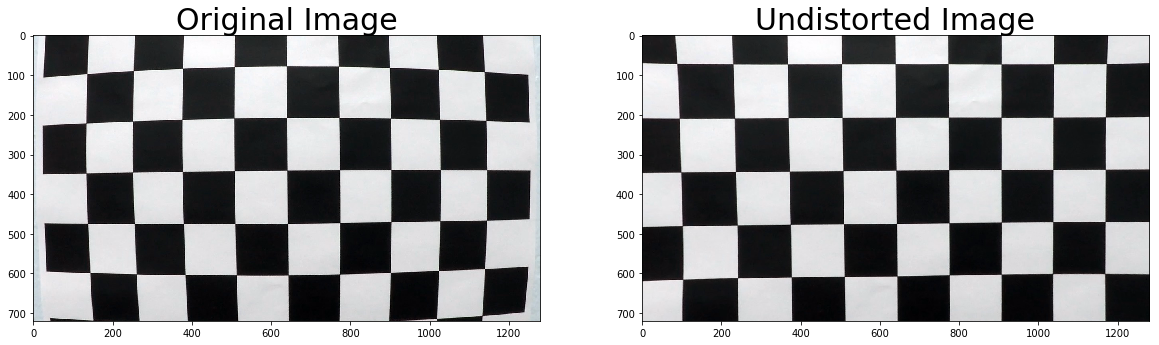

In [3]:
def calibration_check(objpoints, imgpoints):
    # Test undistortion on an image
    img = cv2.imread('camera_cal/calibration1.jpg')
    img_size = (img.shape[1], img.shape[0])

    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None,None)

    # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )

    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    # Visualize undistortion
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)

    plt.show()

calibration_check(objpoints, imgpoints)

# Test Images

In [4]:
import os
import matplotlib.image as mpimg

In [5]:
image_dir = "test_images/"
image_list = os.listdir(image_dir)
image_list

['test6.jpg',
 'straight_lines1.jpg',
 'test5.jpg',
 'test3.jpg',
 'test2.jpg',
 'straight_lines2.jpg',
 'test4.jpg',
 'test1.jpg']

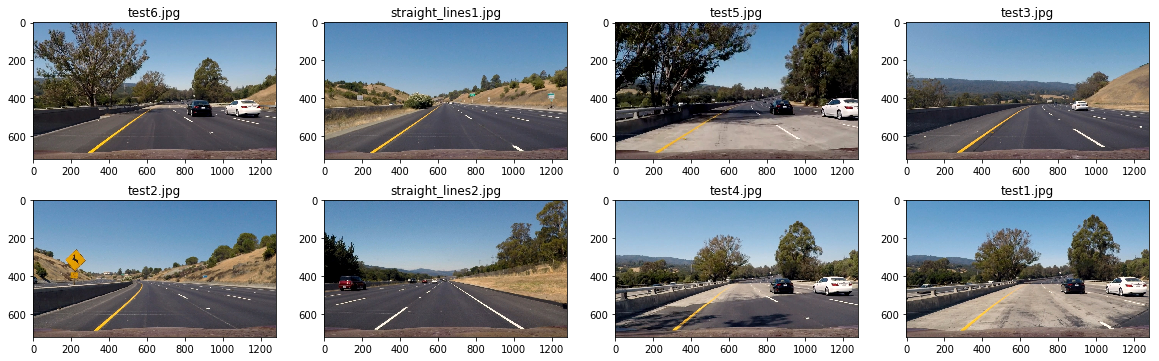

In [6]:
def show_image(i, image, cmap=None):
    if i == 0:
        fig=plt.figure(figsize=(20,6))
    plt.subplot(2, 4, i+1)
    plt.title(image_list[i])
    plt.imshow(image, cmap=cmap)

image_dir = "test_images/"
image_list = os.listdir(image_dir)

for i in range(len(image_list)):
    image = mpimg.imread(image_dir + image_list[i])
    show_image(i, image)

# Caribration images 

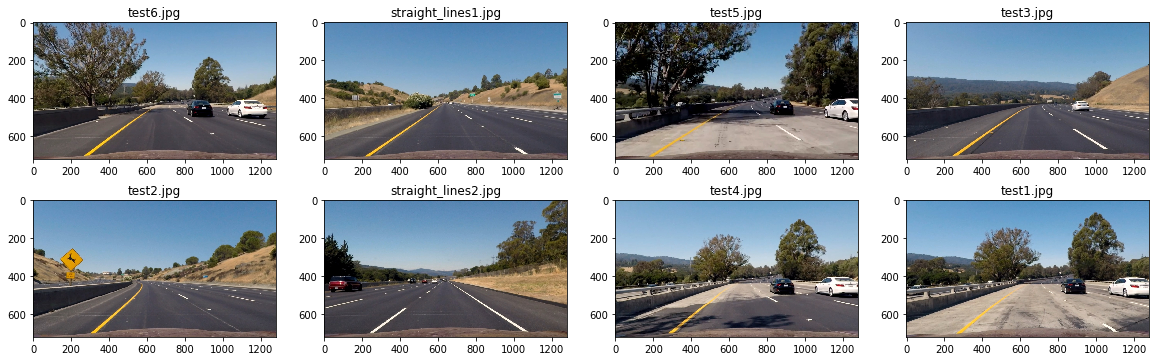

In [7]:
def caribration_image(img, image_dir='none', image_name='none'):
    img_size = (img.shape[1], img.shape[0])
    dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    if image_dir != 'none':
        cv2.imwrite("calib_" + image_dir + image_name, undist)
    return undist

for i in range(len(image_list)):
    image = mpimg.imread(image_dir + image_list[i])
    image_caribrationed = caribration_image(image, image_dir=image_dir, image_name=image_list[i])
    show_image(i, image_caribrationed)

# Transform Image

In [8]:
# %matplotlib qt

In [9]:
# img = mpimg.imread("calib_test_images/straight_lines2.jpg")
# # print(img.shape[1], img.shape[0])
# plt.imshow(img)

In [10]:
# Source		Destination
# 582, 460		320, 0
# 309, 650		320, 720
# 1009, 650		960, 720
# 704, 460		960, 0

In [11]:
# %matplotlib inline

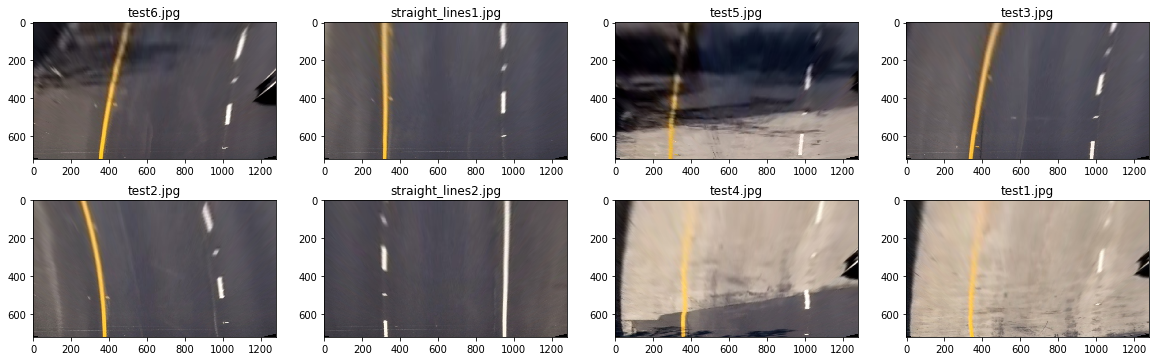

In [12]:
def transform_image(image, mode='none'):
    img_size = (image.shape[1], image.shape[0])
    #1280, 720

    src = np.float32(
        [[582, 460],
        [309, 650],
        [1009, 650],
        [704, 460]])
    dst = np.float32(
        [[(img_size[0] / 4), 0],
        [(img_size[0] / 4), img_size[1]],
        [(img_size[0] * 3 / 4), img_size[1]],
        [(img_size[0] * 3 / 4), 0]])
    
    if mode == "r":
        M = cv2.getPerspectiveTransform(dst, src)
    else:
        M = cv2.getPerspectiveTransform(src, dst)
    
    warped = cv2.warpPerspective(image, M, img_size)
    
    return warped

for i in range(len(image_list)):
    image = mpimg.imread(image_dir + image_list[i])
    image_caribrationed = caribration_image(image)
    image_transformed = transform_image(image_caribrationed)
    show_image(i, image_transformed)

# Color and Gradient

In [13]:
import cv2

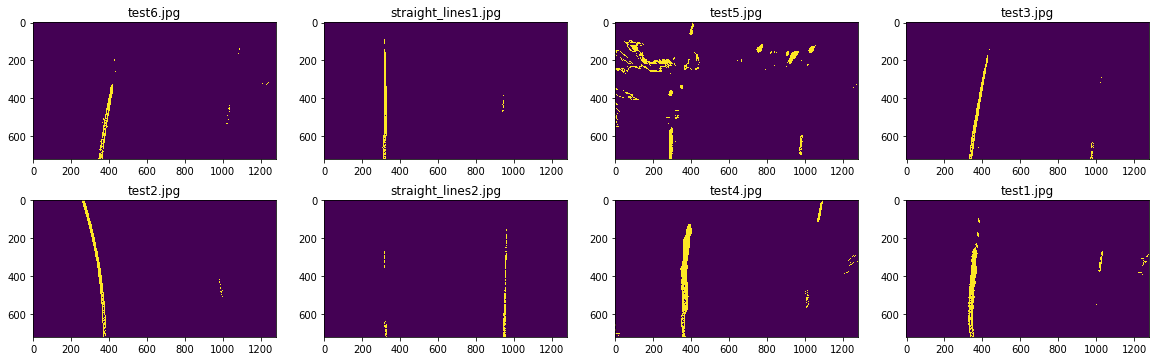

In [14]:
def calc_s_binary(image, s_thresh_min=160, s_thresh_max=254):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    
    return s_binary

for i in range(len(image_list)):
    image = mpimg.imread(image_dir + image_list[i])
    image_caribrationed = caribration_image(image)
    image_transformed = transform_image(image_caribrationed)
    image_s_binary = calc_s_binary(image_transformed)
    show_image(i, image_s_binary)

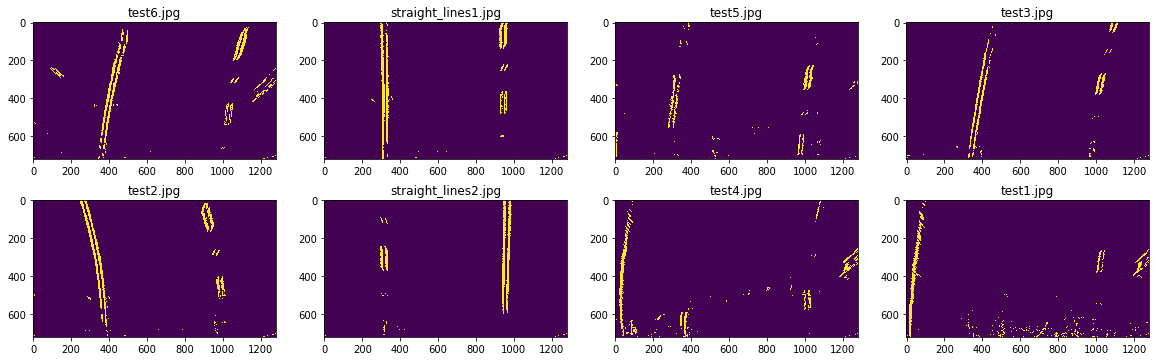

In [15]:
def calc_sx_binary(image, thresh_min = 25, thresh_max = 100):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return sxbinary

for i in range(len(image_list)):
    image = mpimg.imread(image_dir + image_list[i])
    image_caribrationed = caribration_image(image)
    image_transformed = transform_image(image_caribrationed)
    image_sx_binary = calc_sx_binary(image_transformed)
    show_image(i, image_sx_binary)

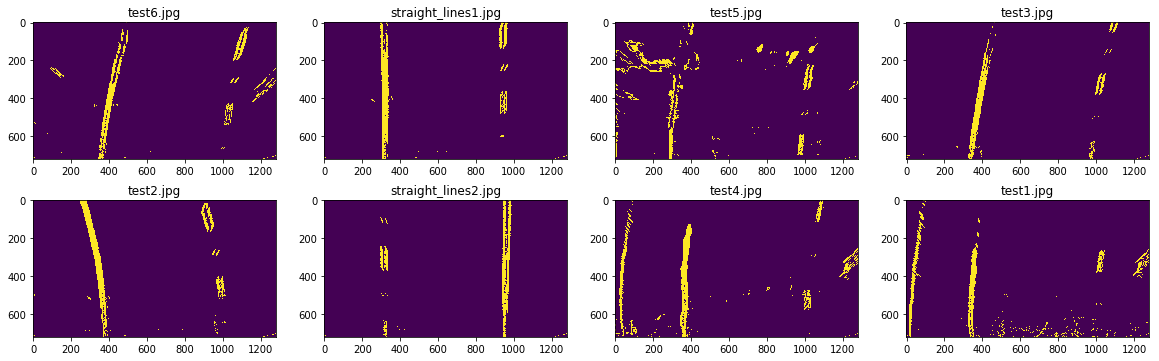

In [16]:
def calc_combined_binary(s_binary, sxbinary):
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    
    return combined_binary

for i in range(len(image_list)):
    image = mpimg.imread(image_dir + image_list[i])
    image_caribrationed = caribration_image(image)
    image_transformed = transform_image(image_caribrationed)
    image_s_binary = calc_s_binary(image_transformed)
    image_sx_binary = calc_sx_binary(image_transformed)
    image_combined_binary = calc_combined_binary(image_s_binary, image_sx_binary)
    show_image(i, image_combined_binary)

# Multi Threshold

In [17]:
# def basic_threshold(gray, clipLimit, threshold):
#     clahe = cv2.createCLAHE(clipLimit, tileGridSize=(8,8))
#     norm_img = clahe.apply(gray)
#     binary = np.zeros_like(norm_img)
#     binary[(norm_img >= threshold) & (norm_img <= 255)] = 1
    
#     return binary, norm_img

def multi_threshold(image, settings):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    combined_binary = np.zeros_like(gray)
    for s in settings:
        color_t = getattr(cv2, 'COLOR_RGB2{}'.format(s['cspace']))
        gray = cv2.cvtColor(image, color_t)[:,:,s['channel']]
        
        #binary, norm_img = basic_threshold(gray, s['clipLimit'], s['threshold'])
        clahe = cv2.createCLAHE(s['clipLimit'], tileGridSize=(8,8))
        norm_img = clahe.apply(gray)
        
#         ret, binary = cv2.threshold(norm_img, params['threshold'], 1, cv2.THRESH_BINARY)
#         scores += binary
        
        binary = np.zeros_like(norm_img)
        binary[(norm_img >= s['threshold']) & (norm_img <= 255)] = 1
        combined_binary[(combined_binary == 1) | (binary == 1)] = 1
    
    return combined_binary

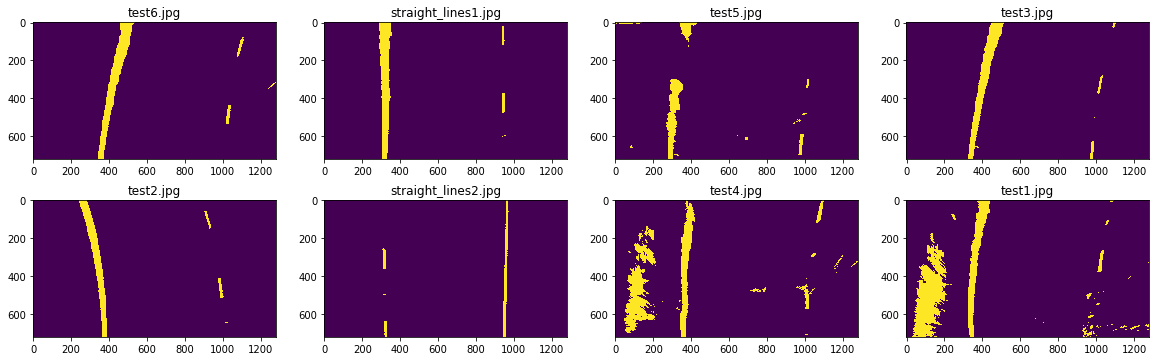

In [18]:
for i in range(len(image_list)):
    image = mpimg.imread(image_dir + image_list[i])
    image_caribrationed = caribration_image(image)
    image_transformed = transform_image(image_caribrationed)
    
    settings = []
    settings.append({'cspace': 'LAB', 'channel': 2, 'clipLimit': 2.0, 'threshold': 150})
    settings.append({'cspace': 'HLS', 'channel': 1, 'clipLimit': 1.0, 'threshold': 220})
    settings.append({'cspace': 'HSV', 'channel': 2, 'clipLimit': 3.0, 'threshold': 230})
    image_threshold = multi_threshold(image_transformed, settings)

    show_image(i, image_threshold)

# Search Standard Peak

369 1028
309 941
303 977
363 982
365 986
320 951
356 1009
338 974


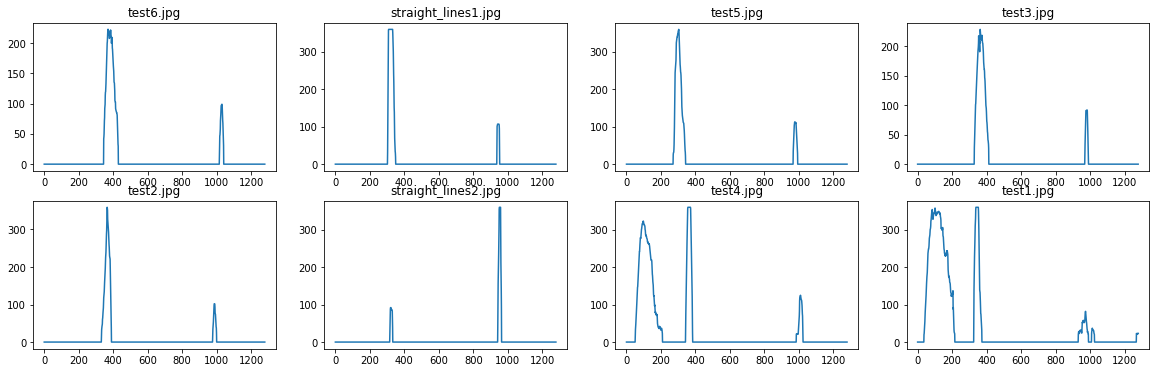

In [19]:
def show_plot(i, plot):
    if i == 0:
        fig=plt.figure(figsize=(20,6))
    plt.subplot(2, 4, i+1)
    plt.title(image_list[i])
    plt.plot(plot)

def calc_half_bottom_histogram(image, white_noise=20):
    histogram_src = np.sum(image[image.shape[0]//2:,:], axis=0)
    histogram_src = np.where(histogram_src < white_noise, 0, histogram_src)
    return histogram_src

def find_two_peaks(histogram, side_margin=250, midle_margin=150, value_th=1):
    midpoint = np.int(histogram.shape[0]//2)
    xmax = np.int(histogram.shape[0])
    
    leftx_base = np.argmax(histogram[side_margin:midpoint-midle_margin]) + side_margin
    rightx_base = np.argmax(histogram[midpoint+midle_margin:xmax-side_margin]) + midpoint + midle_margin
    
    leftx_base_value = histogram[leftx_base]
    rightx_base_value = histogram[rightx_base]
    
    if leftx_base_value <= value_th and rightx_base_value <= value_th:
        leftx_base = 350
        rightx_base = 1280-350
    elif leftx_base_value <= value_th:
        leftx_base = xmax - rightx_base
    elif rightx_base_value <= value_th:
        rightx_base = xmax - leftx_base
    
    return leftx_base, rightx_base

for i in range(len(image_list)):
    image = mpimg.imread(image_dir + image_list[i])
    image_caribrationed = caribration_image(image)
    image_transformed = transform_image(image_caribrationed)
    
    settings = []
    settings.append({'cspace': 'LAB', 'channel': 2, 'clipLimit': 2.0, 'threshold': 150})
    settings.append({'cspace': 'HLS', 'channel': 1, 'clipLimit': 1.0, 'threshold': 220})
    settings.append({'cspace': 'HSV', 'channel': 2, 'clipLimit': 3.0, 'threshold': 230})
    image_threshold = multi_threshold(image_transformed, settings)
    
    bottom_histogram = calc_half_bottom_histogram(image_threshold)
    leftx_base, rightx_base = find_two_peaks(bottom_histogram)
    print(leftx_base, rightx_base)
    show_plot(i, bottom_histogram)

# Moving Window

In [20]:
from numba.decorators import jit

In [21]:
def calc_nonzero_points(image):
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = image.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    return nonzeroy, nonzerox

def calc_dstack(image):
    return np.dstack((image, image, image))*255

@jit
def moving_window(binary_warped, nonzeroy, nonzerox, leftx_base, rightx_base, \
                  nwindows=9, margin=100, minpix=100, debug=False):    
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]//nwindows)

    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    out_img = binary_warped.copy()
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = int(binary_warped.shape[0] - (window+1)*window_height)
        win_y_high = int(binary_warped.shape[0] - window*window_height)
        win_xleft_low = int(leftx_current - margin)
        win_xleft_high = int(leftx_current + margin)
        win_xright_low = int(rightx_current - margin)
        win_xright_high = int(rightx_current + margin)

        # Draw the windows on the visualization image
        # out_img = binary_warped.copy()
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 5) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 5)

        if debug and window == nwindows-1:
            # 現在の探索範囲 (下から探索)
            plt.figure() 
            plt.imshow(out_img)
            plt.show()

            # 窓高さ内のヒストグラム
            histogram = np.sum(out_img[win_y_low:win_y_high,:], axis=0)
            plt.plot(histogram)
            plt.show()

        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                            (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                            (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        # 探索領域内の有効要素を後のフィッティングのために貯めこんでいく
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

        # If you found > minpix pixels, recenter next window on their mean position
        # 窓内で発見した左右の車線位置
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    
    # Concatenate the arrays of indices
    # 配列の連結
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    
    return left_lane_inds, right_lane_inds, out_img

In [22]:
def calc_fitting(nonzeroy, nonzerox, left_lane_inds, right_lane_inds, \
                 alim=0.01, blim=10, lane_width_min=400, lane_width_max=800):
    # left a,b,c [  9.00199449e-05  -2.72302356e-01   5.02215113e+02]
    # right a,b,c [  1.73323778e-04  -2.83396970e-01   1.12500427e+03]
    
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    limit_flag=False
    
    # Fit a second order polynomial to eachnonzerox
    # 二次関数でフィッティング
    try:
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
    except Exception as e:
        left_fit = [0, 0, 350]
        right_fit = [0, 0, 1280-350]
        limit_flag=True

    xmax=1280
    if left_fit[0] > alim:
        left_fit[0] = alim
        limit_flag=True
    elif left_fit[0] < -alim:
        left_fit[0] = -alim
        limit_flag=True
    if left_fit[1] > blim:
        left_fit[1] = blim
        limit_flag=True
    elif left_fit[1] < -blim:
        left_fit[1] = -blim
        limit_flag=True
        
    if right_fit[0] > alim:
        right_fit[0] = alim
        limit_flag=True
    elif right_fit[0] < -alim:
        right_fit[0] = -alim
        limit_flag=True
    if right_fit[1] > blim:
        right_fit[1] = blim
        limit_flag=True
    elif right_fit[1] < -blim:
        right_fit[1] = -blim
        limit_flag=True

    lane_width = right_fit[2] - left_fit[2]
    if lane_width < lane_width_min:
        limit_flag=True
    elif lane_width > lane_width_max:
        limit_flag=True

    return left_fit, right_fit, limit_flag

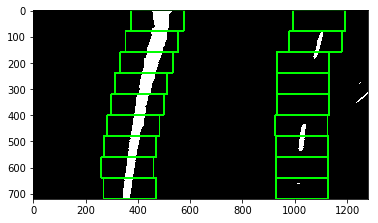

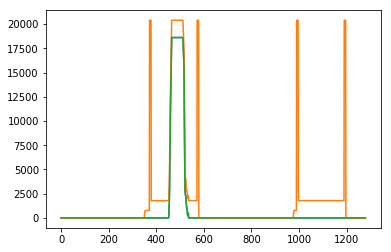

0 test6.jpg
left a,b,c [  9.00199449e-05  -2.72302356e-01   5.02215113e+02]
right a,b,c [  1.73323778e-04  -2.83396970e-01   1.12500427e+03]


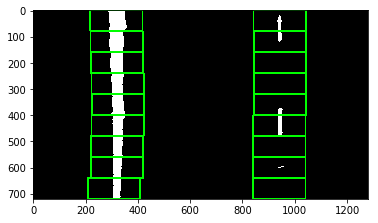

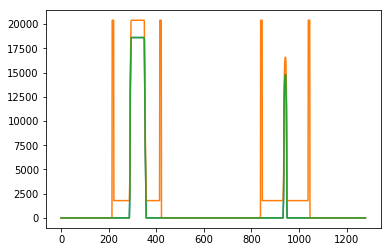

1 straight_lines1.jpg
left a,b,c [ -1.69656654e-05   1.52678054e-02   3.19109070e+02]
right a,b,c [  3.49900607e-06   3.90514251e-03   9.42070739e+02]


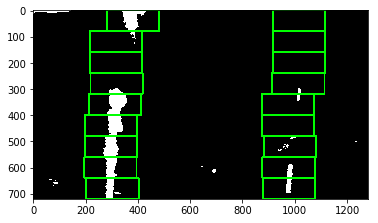

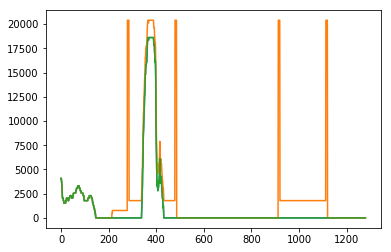

2 test5.jpg
left a,b,c [  1.68675079e-04  -2.50983470e-01   3.86529581e+02]
right a,b,c [  4.03723638e-04  -5.05508329e-01   1.13524460e+03]


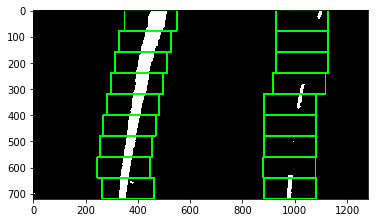

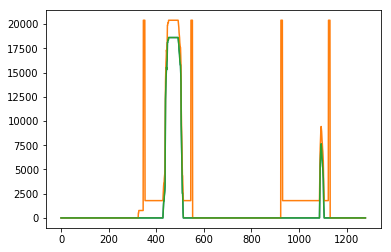

3 test3.jpg
left a,b,c [  1.21369996e-04  -2.82920807e-01   4.81957834e+02]
right a,b,c [  1.73518662e-04  -2.95616279e-01   1.10005532e+03]


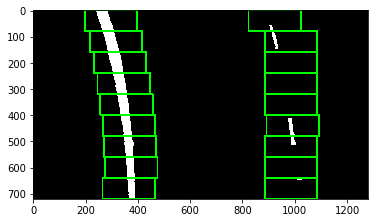

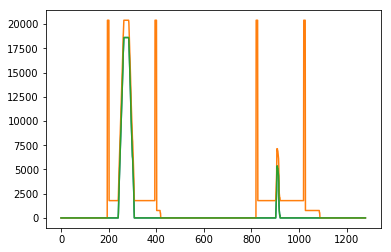

4 test2.jpg
left a,b,c [ -2.12857751e-04   3.09767276e-01   2.63097538e+02]
right a,b,c [ -9.22874329e-05   2.40252178e-01   8.97030027e+02]


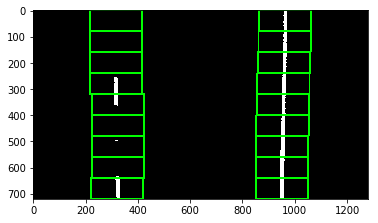

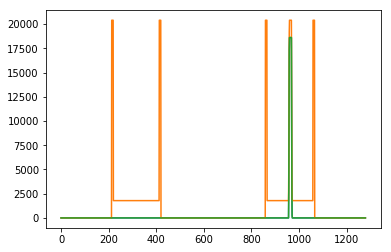

5 straight_lines2.jpg
left a,b,c [  4.86281418e-05  -2.72127936e-02   3.20513101e+02]
right a,b,c [ -1.93198517e-06  -2.07253621e-02   9.64934165e+02]


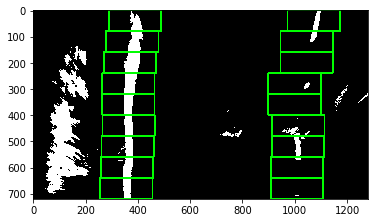

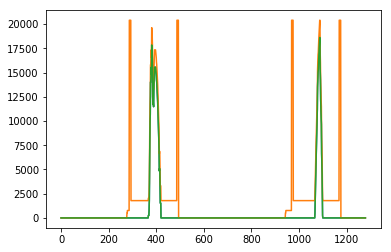

6 test4.jpg
left a,b,c [  1.05178396e-04  -1.30791244e-01   4.01175790e+02]
right a,b,c [  2.60889064e-04  -3.07771359e-01   1.09783136e+03]


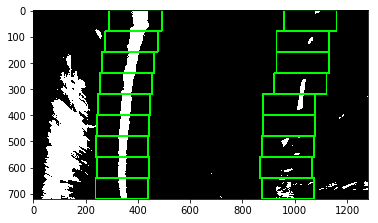

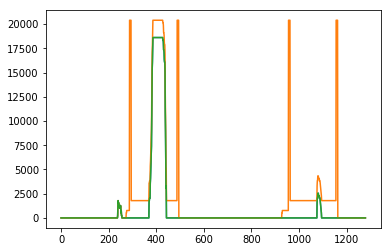

7 test1.jpg
left a,b,c [  1.97023641e-04  -2.44506532e-01   4.17249593e+02]
right a,b,c [  7.78353157e-05  -2.32492178e-01   1.08867119e+03]


In [23]:
for i in range(len(image_list)):
    # open
    image = mpimg.imread(image_dir + image_list[i])
    
    # caribration, transform
    image_caribrationed = caribration_image(image)
    image_transformed = transform_image(image_caribrationed)
    
    # filters
    settings = []
    settings.append({'cspace': 'LAB', 'channel': 2, 'clipLimit': 2.0, 'threshold': 150})
    settings.append({'cspace': 'HLS', 'channel': 1, 'clipLimit': 1.0, 'threshold': 220})
    settings.append({'cspace': 'HSV', 'channel': 2, 'clipLimit': 3.0, 'threshold': 230})
    image_threshold = multi_threshold(image_transformed, settings)
    
    # histogram
    bottom_histogram = calc_half_bottom_histogram(image_threshold)
    leftx_base, rightx_base = find_two_peaks(bottom_histogram)
    nonzeroy, nonzerox = calc_nonzero_points(image_threshold)
    image_threshold_dstack = calc_dstack(image_threshold)
    
    # fine suitable area by moving window
    left_lane_inds, right_lane_inds, image_window = moving_window(image_threshold_dstack, \
                                                                  nonzeroy, nonzerox, leftx_base, rightx_base, \
                                                                  nwindows=9, margin=100, minpix=100, debug=True)
    # calc lane abc
    left_fit, right_fit, limit_flag = calc_fitting(nonzeroy, nonzerox, left_lane_inds, right_lane_inds)
    
    print(i, image_list[i])
    print("left a,b,c", left_fit)
    print("right a,b,c", right_fit)

# Check LInes

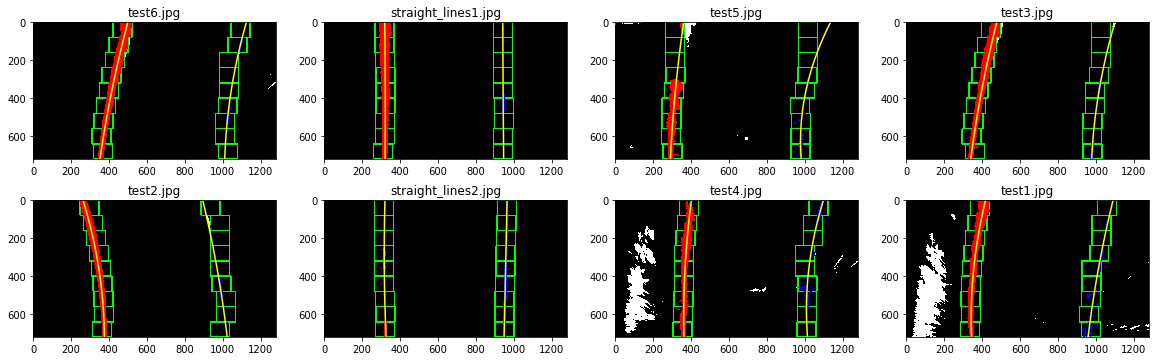

In [24]:
def calc_fitpoints(image, left_fit, right_fit):
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    return left_fitx, right_fitx

def show_plot_line(i, image, nonzeroy, nonzerox, left_lane_inds, right_lane_inds, left_fitx, right_fitx):
    if i == 0:
        fig=plt.figure(figsize=(20,6))
    plt.subplot(2, 4, i+1)
    plt.title(image_list[i])
    
    image[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    image[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    plt.imshow(image)

    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)

for i in range(len(image_list)):
    # open
    image = mpimg.imread(image_dir + image_list[i])
    
    # caribration, transform
    image_caribrationed = caribration_image(image)
    image_transformed = transform_image(image_caribrationed)
    
    # filters
    settings = []
    settings.append({'cspace': 'LAB', 'channel': 2, 'clipLimit': 2.0, 'threshold': 150})
    settings.append({'cspace': 'HLS', 'channel': 1, 'clipLimit': 1.0, 'threshold': 220})
    settings.append({'cspace': 'HSV', 'channel': 2, 'clipLimit': 3.0, 'threshold': 230})
    image_threshold = multi_threshold(image_transformed, settings)
    
    # histogram
    bottom_histogram = calc_half_bottom_histogram(image_threshold)
    leftx_base, rightx_base = find_two_peaks(bottom_histogram)
    nonzeroy, nonzerox = calc_nonzero_points(image_threshold)
    image_threshold_dstack = calc_dstack(image_threshold)
    
    # fine suitable area by moving window
    left_lane_inds, right_lane_inds, image_window = moving_window(image_threshold_dstack, \
                                                                  nonzeroy, nonzerox, leftx_base, rightx_base, \
                                                                  nwindows=9, margin=50, minpix=0, debug=False)
    # calc lane abc
    left_fit, right_fit, limit_flag = calc_fitting(nonzeroy, nonzerox, left_lane_inds, right_lane_inds)
    
    left_fitx, right_fitx = calc_fitpoints(image_threshold_dstack, left_fit, right_fit)
    show_plot_line(i, image_window, nonzeroy, nonzerox, \
                   left_lane_inds, right_lane_inds, left_fitx, right_fitx)

# Second Fitting

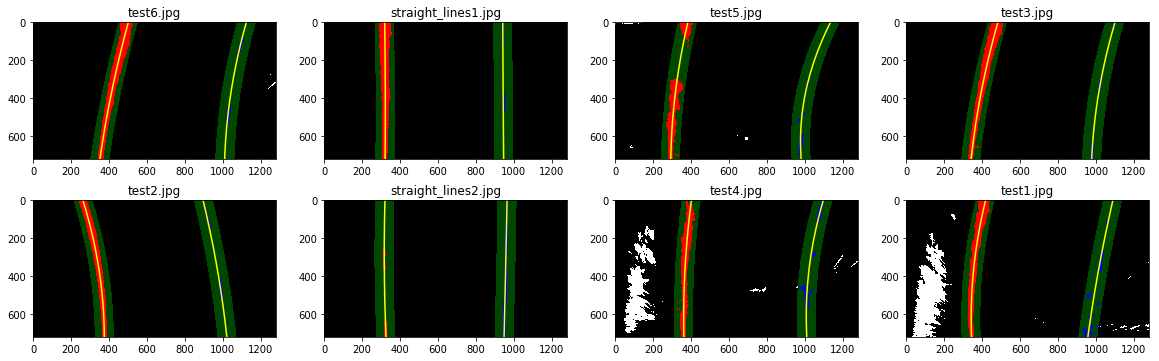

In [25]:
def calc_ane_inds_width_limit(nonzeroy, nonzerox, left_fit, right_fit, margin=50):
    left_lane_inds_width_limit = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                                    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds_width_limit = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    return left_lane_inds_width_limit, right_lane_inds_width_limit

def calc_window_img(image, left_fitx, right_fitx, margin=50, color=(0,55, 0)):
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
#     window_img = np.zeros_like(image)
    window_img = image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), color)
    cv2.fillPoly(window_img, np.int_([right_line_pts]), color)
    
    return window_img

def show_plot_line_area(i, image, nonzeroy, nonzerox, left_lane_inds, right_lane_inds, left_fitx, right_fitx, window_img):
    if i == 0:
        fig=plt.figure(figsize=(20,6))
    plt.subplot(2, 4, i+1)
    plt.title(image_list[i])
    
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    
    image[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    image[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    result = cv2.addWeighted(image, 1, window_img, 0.3, 0)
    plt.imshow(result)

    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)

for i in range(len(image_list)):
    # open
    image = mpimg.imread(image_dir + image_list[i])
    
    # caribration, transform
    image_caribrationed = caribration_image(image)
    image_transformed = transform_image(image_caribrationed)
    
    # filter
    settings = []
    settings.append({'cspace': 'LAB', 'channel': 2, 'clipLimit': 2.0, 'threshold': 150})
    settings.append({'cspace': 'HLS', 'channel': 1, 'clipLimit': 1.0, 'threshold': 220})
    settings.append({'cspace': 'HSV', 'channel': 2, 'clipLimit': 3.0, 'threshold': 230})
    image_threshold = multi_threshold(image_transformed, settings)
    
    # histogram
    bottom_histogram = calc_half_bottom_histogram(image_threshold)
    leftx_base, rightx_base = find_two_peaks(bottom_histogram)
    nonzeroy, nonzerox = calc_nonzero_points(image_threshold)
    image_threshold_dstack = calc_dstack(image_threshold)
    
    # fine suitable area by moving window
    left_lane_inds, right_lane_inds, image_window = moving_window(image_threshold_dstack, \
                                                    nonzeroy, nonzerox, leftx_base, rightx_base, \
                                                    nwindows=9, margin=50, minpix=0, debug=False)
    # calc lane abc
    left_fit, right_fit, limit_flag = calc_fitting(nonzeroy, nonzerox, left_lane_inds, right_lane_inds)
    
    # limit calc area
    left_lane_inds_lim, right_fit_inds_lim = calc_ane_inds_width_limit(nonzeroy, nonzerox, left_fit, right_fit)
    # calc lane abc again
    left_fit2, right_fit2, limit_flag = calc_fitting(nonzeroy, nonzerox, left_lane_inds_lim, right_fit_inds_lim)
    
    # calc lane array
    left_fitx, right_fitx = calc_fitpoints(image_threshold_dstack, left_fit2, right_fit2)
    # show
    window_img = calc_window_img(image_threshold_dstack, left_fitx, right_fitx)
    show_plot_line_area(i, image_threshold_dstack, nonzeroy, nonzerox, \
                        left_lane_inds_lim, right_fit_inds_lim, left_fitx, right_fitx, window_img)

# Transform Reverse

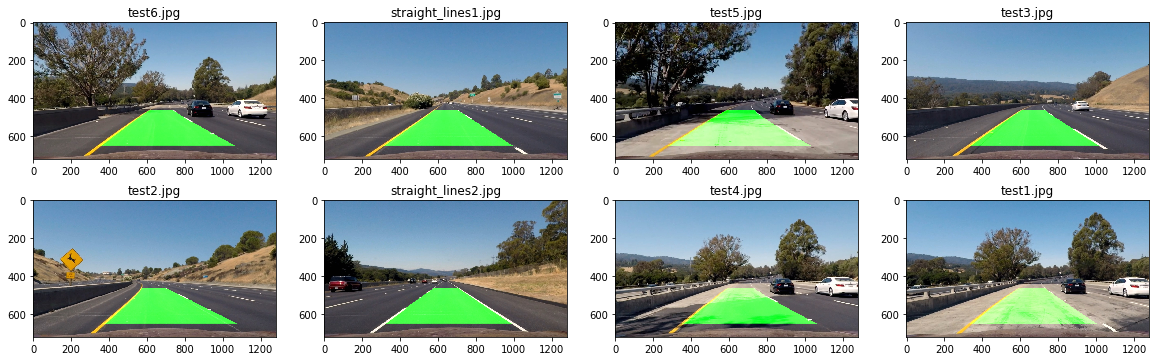

In [26]:
def calc_road_img(image, left_fitx, right_fitx):
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    
    line_window1 = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    line_pts = np.hstack((line_window1, line_window2))

    # Draw the lane onto the warped blank image
    window_img = np.zeros_like(image)
    cv2.fillPoly(window_img, np.int_([line_pts]), (0,255, 0))
    
    return window_img

def combine_images(masked_image, line_image):
    if len(masked_image.shape) == 2:
        masked_image = np.dstack((masked_image, masked_image, masked_image))
    if len(line_image.shape) == 2:
        line_image = np.dstack((line_image, line_image, line_image))
    return cv2.addWeighted(masked_image, 1.0, line_image, 1.0, 1)

for i in range(len(image_list)):
    # open
    image = mpimg.imread(image_dir + image_list[i])
    
    # caribration, transform
    image_caribrationed = caribration_image(image)
    image_transformed = transform_image(image_caribrationed)
    
    # filter
    settings = []
    settings.append({'cspace': 'LAB', 'channel': 2, 'clipLimit': 2.0, 'threshold': 150})
    settings.append({'cspace': 'HLS', 'channel': 1, 'clipLimit': 1.0, 'threshold': 220})
    settings.append({'cspace': 'HSV', 'channel': 2, 'clipLimit': 3.0, 'threshold': 230})
    image_threshold = multi_threshold(image_transformed, settings)
    
    # histogram
    bottom_histogram = calc_half_bottom_histogram(image_threshold)
    leftx_base, rightx_base = find_two_peaks(bottom_histogram)
    nonzeroy, nonzerox = calc_nonzero_points(image_threshold)
    image_threshold_dstack = calc_dstack(image_threshold)
    
    # fine suitable area by moving window
    left_lane_inds, right_lane_inds, image_window = moving_window(image_threshold_dstack, \
                                                                  nonzeroy, nonzerox, leftx_base, rightx_base, \
                                                                  nwindows=9, margin=100, minpix=100, debug=False)
    # calc lane abc
    left_fit, right_fit, limit_flag = calc_fitting(nonzeroy, nonzerox, left_lane_inds, right_lane_inds)
    
    # limit calc area
    left_lane_inds_lim, right_fit_inds_lim = calc_ane_inds_width_limit(nonzeroy, nonzerox, left_fit, right_fit)
    # calc lane abc again
    left_fit2, right_fit2, limit_flag = calc_fitting(nonzeroy, nonzerox, left_lane_inds_lim, right_fit_inds_lim)
    
    # calc lane array
    left_fitx, right_fitx = calc_fitpoints(image_threshold_dstack, left_fit2, right_fit2)
    # calc road area
    road_img = calc_road_img(image_threshold_dstack, left_fitx, right_fitx)
        
    road_transformed = transform_image(road_img, mode="r")
    image_caribrationed_road_are = combine_images(image_caribrationed, road_transformed)
    show_image(i, image_caribrationed_road_are)

# Test Videos

In [27]:
import imageio
imageio.plugins.ffmpeg.download()

from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [28]:
def show_movie(target_file):
    display(HTML("""
    <video width="640" height="360" controls>
      <source src="{0}" type="video/mp4">
    </video>
    """.format(target_file)))

movie_dir = "test_videos/"
movie_list = os.listdir(movie_dir)
for i in movie_list:
    target_file = movie_dir + i
    show_movie(target_file)
    print(i, '\n')

challenge_video.mp4 



harder_challenge_video.mp4 



project_video.mp4 



# Lane Detection

In [29]:
def show_plot_line_area(i, image, nonzeroy, nonzerox, left_lane_inds, right_lane_inds, left_fitx, right_fitx, window_img):
    if i == 0:
        fig=plt.figure(figsize=(20,6))
    plt.subplot(2, 4, i+1)
    plt.title(image_list[i])
    
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    
    image[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    image[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    result = cv2.addWeighted(image, 1, window_img, 0.3, 0)
    plt.imshow(result)

    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)

In [30]:
def titled_overlay(image, overlay, title, org, border_thickness=2):
    """Puts a title above the overlay image and places it in image at the given origin."""
    # Place title
    title_img = np.ones((50, overlay.shape[1], 3)).astype('uint8') * 255
    cv2.putText(title_img, title, org=(10, 35), fontScale=0.5, thickness=2, color=(0, 0, 0),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, lineType=cv2.LINE_AA)
    
    if len(overlay.shape) == 2:
        overlay = np.dstack((overlay, overlay, overlay))*255
    
    # Add title to overlay
    overlay = np.concatenate((title_img, overlay), axis=0)
    
    # Add border to overlay
    overlay[:border_thickness, :, :] = 255
    overlay[-border_thickness:, :, :] = 255
    overlay[:, :border_thickness, :] = 255
    overlay[:, -border_thickness:, :] = 255

    # Place overlay onto image
    x_offset, y_offset = org
    image[y_offset:y_offset + overlay.shape[0], x_offset:x_offset + overlay.shape[1]] = overlay

In [31]:
class lane_detection:
    def __init__(self):
        self.start_flag = True
        self.limit_flag = False
        self.left_fit = [0, 0, 350]
        self.right_fit = [0, 0, 1280-350]
        self.left_fitx = 0
        self.right_fitx = 0
        self.lpf_gain = 0.1
        self.image_z1 = 0
        
    def process_image(self, image, debug=False):
        # caribration, transform
        image_caribrationed = caribration_image(image)
        image_transformed = transform_image(image_caribrationed)

        try:    
            # filter
            settings = []
            settings.append({'cspace': 'LAB', 'channel': 2, 'clipLimit': 2.0, 'threshold': 150})
            settings.append({'cspace': 'HLS', 'channel': 1, 'clipLimit': 2.0, 'threshold': 210})
            settings.append({'cspace': 'HSV', 'channel': 2, 'clipLimit': 6.0, 'threshold': 220})
            image_threshold = multi_threshold(image_transformed, settings)

            # histogram
            bottom_histogram = calc_half_bottom_histogram(image_threshold)
            if self.start_flag or self.limit_flag:
                leftx_base, rightx_base = find_two_peaks(bottom_histogram)
            else:
                leftx_base = self.left_fitx[image_threshold.shape[0]-1]
                rightx_base = self.right_fitx[image_threshold.shape[0]-1]
            
            nonzeroy, nonzerox = calc_nonzero_points(image_threshold)
            image_threshold_dstack = calc_dstack(image_threshold)

            # fine suitable area by moving window
            left_lane_inds, right_lane_inds, image_window = moving_window(image_threshold_dstack, \
                                                                          nonzeroy, nonzerox, leftx_base, rightx_base, \
                                                                          nwindows=8, margin=150, minpix=50, debug=debug)
            # calc lane abc
            if self.start_flag or self.limit_flag:
                left_fit, right_fit, self.limit_flag = calc_fitting(nonzeroy, nonzerox, left_lane_inds, right_lane_inds)
            else:
                # limit calc area
                left_lane_inds_lim, right_fit_inds_lim = calc_ane_inds_width_limit(nonzeroy, nonzerox, \
                                                                                   self.left_fit, self.right_fit, \
                                                                                   margin=50)
                left_fit, right_fit, self.limit_flag = calc_fitting(nonzeroy, nonzerox, left_lane_inds_lim, right_fit_inds_lim)

            # lan lpf
            if self.start_flag:
                self.left_fit = left_fit
                self.right_fit = right_fit
            else:
                self.left_fit[0] = (left_fit[0] * self.lpf_gain) + (self.left_fit[0] * (1.0-self.lpf_gain))
                self.left_fit[1] = (left_fit[1] * self.lpf_gain) + (self.left_fit[1] * (1.0-self.lpf_gain))
                self.left_fit[2] = (left_fit[2] * self.lpf_gain) + (self.left_fit[2] * (1.0-self.lpf_gain))
                self.right_fit[0] = (right_fit[0] * self.lpf_gain) + (self.right_fit[0] * (1.0-self.lpf_gain))
                self.right_fit[1] = (right_fit[1] * self.lpf_gain) + (self.right_fit[1] * (1.0-self.lpf_gain))
                self.right_fit[2] = (right_fit[2] * self.lpf_gain) + (self.right_fit[2] * (1.0-self.lpf_gain))

            # calc lane array
            self.left_fitx, self.right_fitx = calc_fitpoints(image_threshold_dstack, self.left_fit, self.right_fit)
            image_window_line = calc_window_img(image_window, self.left_fitx, self.right_fitx, margin=3, color=(255,255,0))
            # calc road area
            road_img = calc_road_img(image_threshold_dstack, self.left_fitx, self.right_fitx)

            road_transformed = transform_image(road_img, mode="r")
            image_caribrationed_road_area = combine_images(image_caribrationed, road_transformed)
            
            # overlay
            overhead_img = cv2.resize(image_transformed, None, fx=1 / 3.0, fy=1 / 3.0)
            titled_overlay(image_caribrationed_road_area, overhead_img, \
                           'Overhead (not to scale)', (0, 0))
            overhead_img = cv2.resize(image_threshold, None, fx=1 / 3.0, fy=1 / 3.0)
            titled_overlay(image_caribrationed_road_area, overhead_img, \
                           'Raw Lane Detection', (image_caribrationed_road_area.shape[1]//3, 0))
            overhead_img = cv2.resize(image_window_line, None, fx=1 / 3.0, fy=1 / 3.0)
            titled_overlay(image_caribrationed_road_area, overhead_img, \
                           'Filtered Lane Detection', (image_caribrationed_road_area.shape[1] // 3 * 2, 0))

            # store z1
            self.start_flag = False
            self.image_z1 = road_transformed
            
            if debug:
                plt.figure()
                plt.imshow(image_window_line)
                plt.show()
                print(self.left_fit, self.right_fit)

            return image_caribrationed_road_area 
        except Exception as e:
            print(e)
            return combine_images(image_caribrationed, self.image_z1)

In [32]:
ld = lane_detection()
white_output = 'test_videos_output/challenge_video.mp4'
clip1 = VideoFileClip("test_videos/challenge_video.mp4").subclip(2,2.01)
white_clip = clip1.fl_image(lambda x: ld.process_image(x, debug=False)) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge_video.mp4
[MoviePy] Writing video test_videos_output/challenge_video.mp4


100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge_video.mp4 

CPU times: user 460 ms, sys: 232 ms, total: 692 ms
Wall time: 278 ms


In [33]:
ld = lane_detection()
white_output = 'test_videos_output/project_video.mp4'
clip1 = VideoFileClip("test_videos/project_video.mp4").subclip(20,50)
white_clip = clip1.fl_image(lambda x: ld.process_image(x, debug=False)) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/project_video.mp4
[MoviePy] Writing video test_videos_output/project_video.mp4


100%|█████████▉| 750/751 [02:55<00:00,  4.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/project_video.mp4 

CPU times: user 6min 3s, sys: 2.84 s, total: 6min 5s
Wall time: 2min 57s


In [34]:
ld = lane_detection()
white_output = 'test_videos_output/harder_challenge_video.mp4'
clip1 = VideoFileClip("test_videos/harder_challenge_video.mp4").subclip(1,10)
white_clip = clip1.fl_image(lambda x: ld.process_image(x, debug=False)) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/harder_challenge_video.mp4
[MoviePy] Writing video test_videos_output/harder_challenge_video.mp4


100%|█████████▉| 225/226 [00:59<00:00,  3.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/harder_challenge_video.mp4 

CPU times: user 1min 57s, sys: 940 ms, total: 1min 58s
Wall time: 1min 1s
